In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import sklearn 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are 908 rows and 25 columns in the dataset

In [3]:
df.shape

(908, 25)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Above we can see that out of 25 columns, 12 have object datatype and 13 have float datatype.

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Above we can see the datatypes of each column and null values in each column

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

<Axes: >

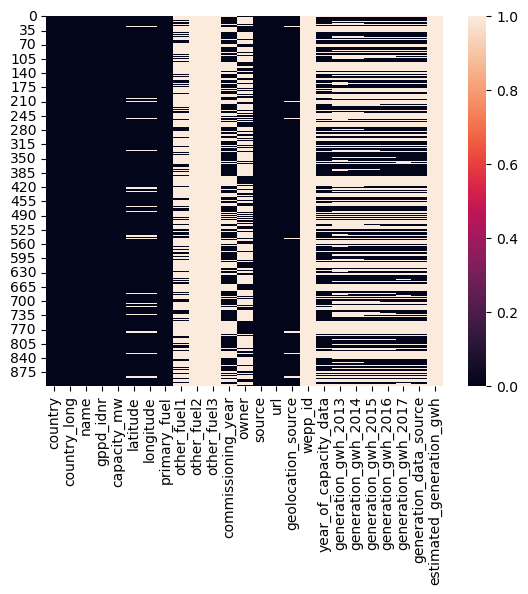

In [9]:
sns.heatmap(df.isnull())

Above heatmap shows the presence of null values in the dataset. As we cab see that other fuel 3, wepp id, estimated_generation_gwh have all null values, we will drop these columns.

In [10]:
df=df.drop((["estimated_generation_gwh",'other_fuel3','wepp_id']),axis=1)

In [11]:
df.shape

(908, 22)

In [12]:
df.nunique().to_frame()

,0
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
other_fuel1,3
other_fuel2,1


Above we can see that gppd_idnr is unique id to each row which does not adds any unique value to the dataset, so we will drop it. Also url,owner and geological source,generation_data_source can be dropped from the dataset.
We can also drop other_fuel2 and other_fuel1 and there are lot of null values in those columns

In [13]:
df=df.drop((['other_fuel2','other_fuel1']),axis=1)

In [14]:
df=df.drop((['url','geolocation_source','owner','gppd_idnr','generation_data_source']),axis=1)

we can also drop country and country_long as the entire data is for India only.

In [15]:
df=df.drop((['country','country_long']),axis=1)

In [16]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN


Now lets begin our EDA

As per the problem statement we have to predict
1. Primary fuel(classification problem)
2. capacity_mw(regression problem)

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

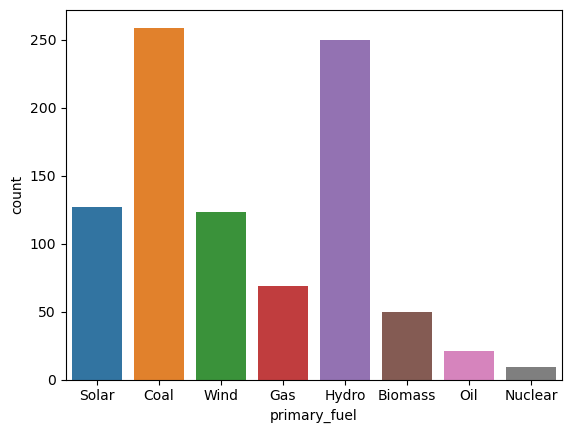

In [17]:
sns.countplot(x='primary_fuel',data=df)
df['primary_fuel'].value_counts()

Above we can see that coal is the top most fuel used in the power plants in India followed by Hydro. The least used is Nuclear

In [18]:
df.isnull().sum()

name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [19]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

Since there is only 1 value in year_of_capacity_data, we can drop it.


In [20]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

Lets segrregate the object and numerical columns:
    

In [21]:
numerical=[]
categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
    else:
        numerical.append(i)
        

In [22]:
numerical

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

Now lets handle the null values

In [23]:
df.fillna(df.median()[0],inplace=True)

In [24]:
df.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Here we can see that we have checked all the null values present in the dataset.

In [25]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,23.162021,76.563926,1186.289648,1009.029442,1102.420396,1161.851056,1212.147753,1265.933067
std,580.221767,10.467197,6.125132,956.102221,2703.921589,2911.965280,3092.202997,3117.593315,3173.696579
min,0.000000,8.168900,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
50%,60.000000,22.137800,76.492900,1978.000000,60.000000,60.000000,60.000000,60.000000,60.000000
75%,388.125000,26.740475,79.211600,2003.000000,470.116200,570.095213,605.769975,669.808766,708.134037
max,4760.000000,60.000000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


Above we can see that all columns now have 908 rows with no null values.
Max value in each column is very high from the 75th percentile wich shows the presence of outliers.
Mean is greater than median except in commissioning_year which indicates the presence of skewness in the data, primarily positively skewed data.

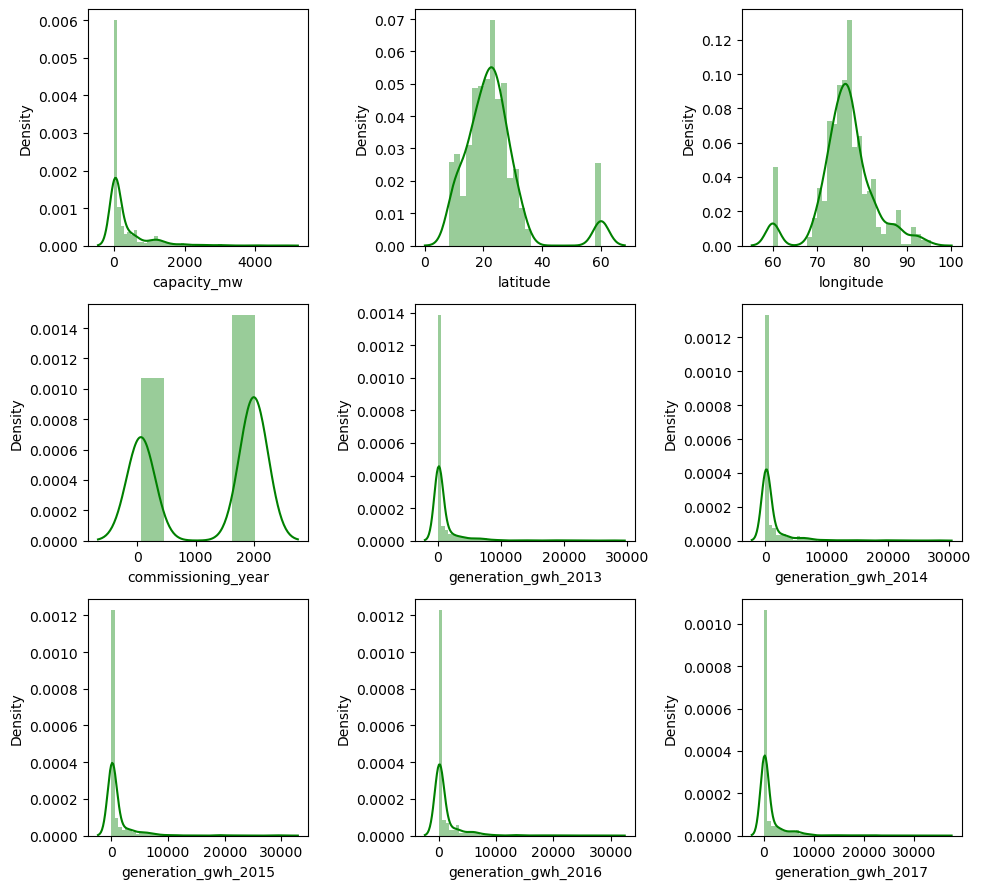

In [26]:
plt.figure(figsize=(10,9))
plotnumber=1
for col in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above distribution graph shows that the data is right skewed.

In [27]:
dfcor=df.corr()
dfcor

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,-0.055235,0.218567,0.413675,0.775344,0.826067,0.851752,0.885536,0.901065
latitude,-0.055235,1.000000,-0.494141,0.087553,-0.029970,-0.029666,-0.030536,-0.031956,-0.025636
longitude,0.218567,-0.494141,1.000000,0.300270,0.156698,0.162828,0.172761,0.189201,0.202744
commissioning_year,0.413675,0.087553,0.300270,1.000000,0.298716,0.305196,0.304374,0.316101,0.325180
generation_gwh_2013,0.775344,-0.029970,0.156698,0.298716,1.000000,0.972775,0.911665,0.881082,0.843036
generation_gwh_2014,0.826067,-0.029666,0.162828,0.305196,0.972775,1.000000,0.966617,0.937817,0.907399
generation_gwh_2015,0.851752,-0.030536,0.172761,0.304374,0.911665,0.966617,1.000000,0.974645,0.943752
generation_gwh_2016,0.885536,-0.031956,0.189201,0.316101,0.881082,0.937817,0.974645,1.000000,0.976285
generation_gwh_2017,0.901065,-0.025636,0.202744,0.325180,0.843036,0.907399,0.943752,0.976285,1.000000


<Axes: >

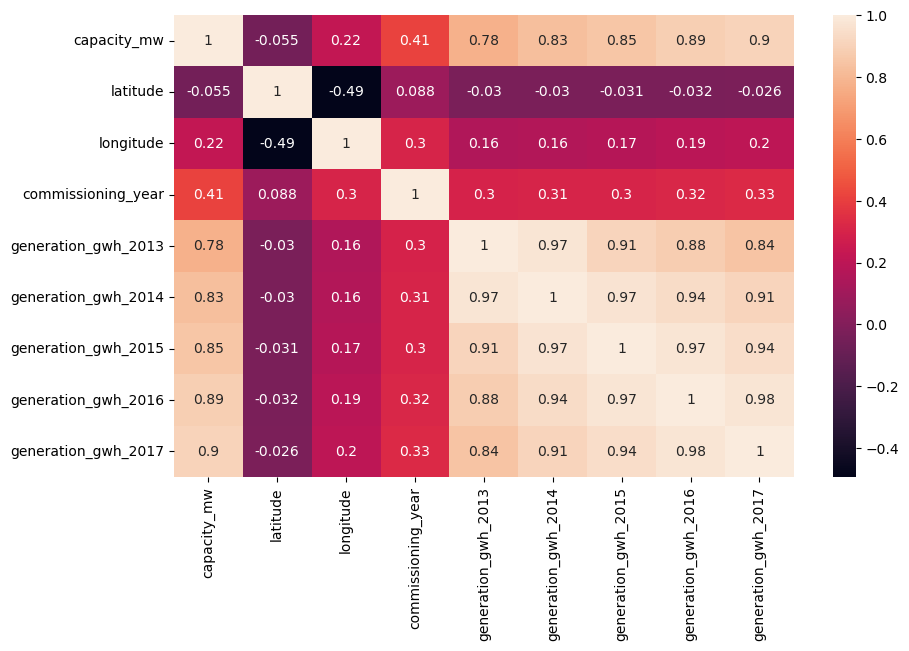

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True)

Here we can see that capacity_mw is highly correlated with generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014
Also generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014 are highly correlated with each other..
Latitude is neagtively correlated with capacity_mw.
Latitude and longitude are negatively correlated

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

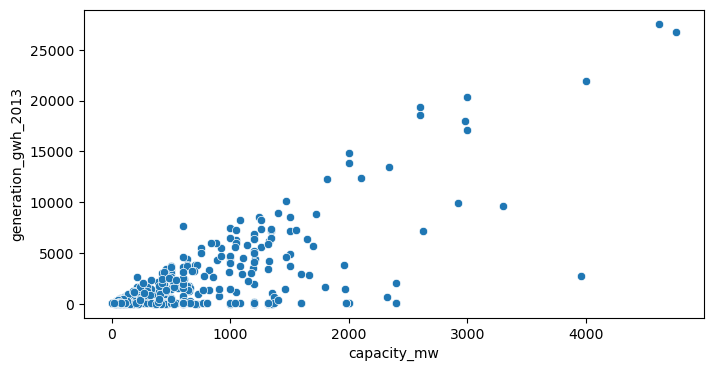

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

Here we can see that generation_gwh_2013 increases with increase in capacity_mw which indicates positive correlation

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

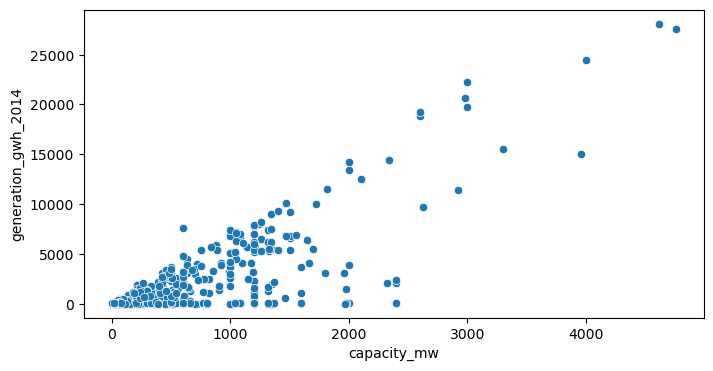

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

Here we can see that generation_gwh_2014 increases with increase in capacity_mw which indicates positive correlation

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

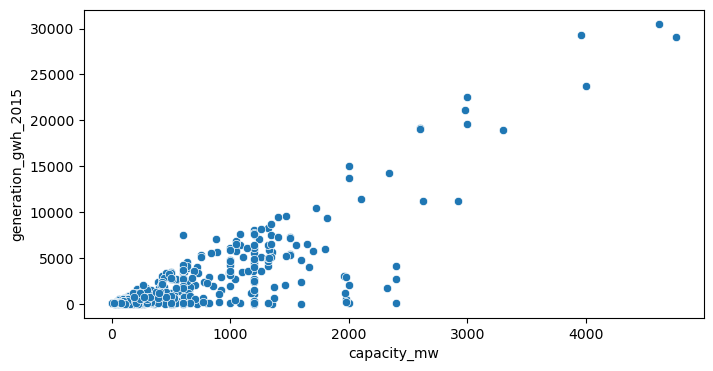

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

Here we can see that generation_gwh_2015 increases with increase in capacity_mw which indicates positive correlation

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

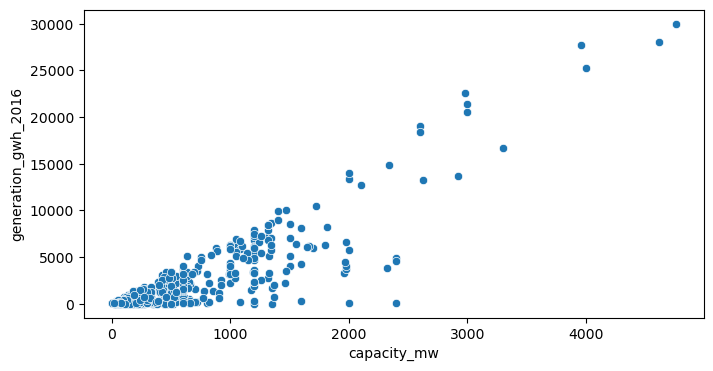

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

Here we can see that generation_gwh_2016 increases with increase in capacity_mw which indicates positive correlation

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

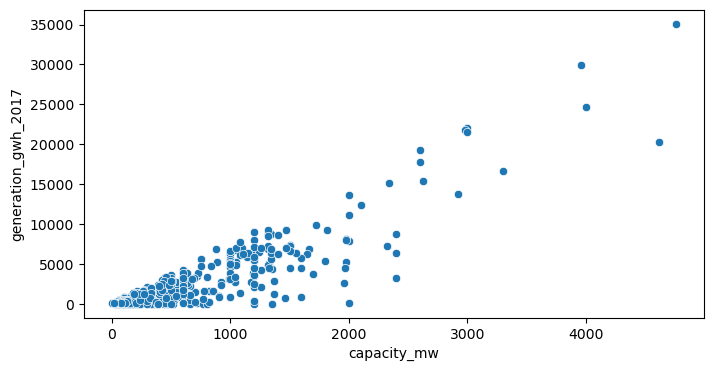

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

Here we can see that generation_gwh_2017 increases with increase in capacity_mw which indicates positive correlation

<Axes: xlabel='capacity_mw', ylabel='latitude'>

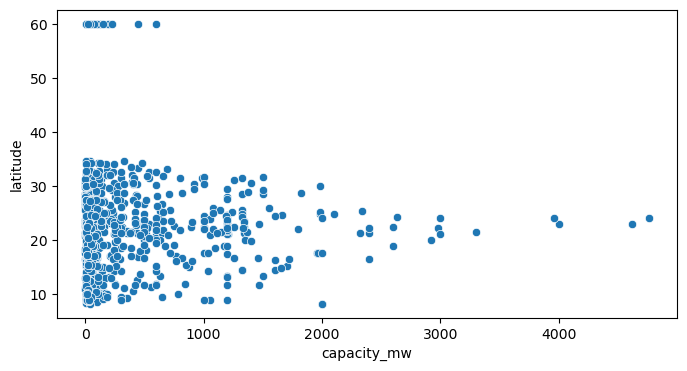

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

Here we can see that with increase in latitude , capacity_mw decreases

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

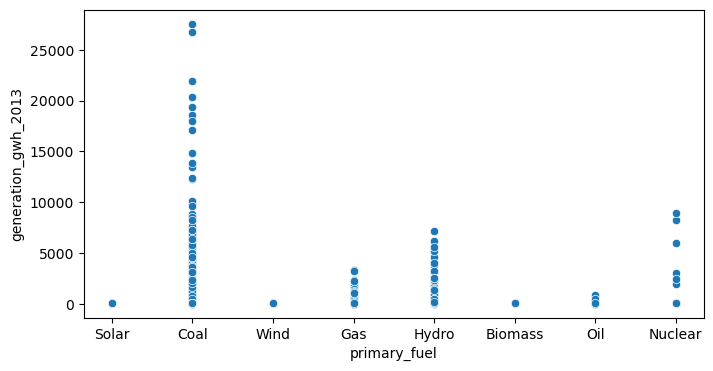

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

here we can see that coal was the most used primary fuel in 2013 followed by Hydro

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

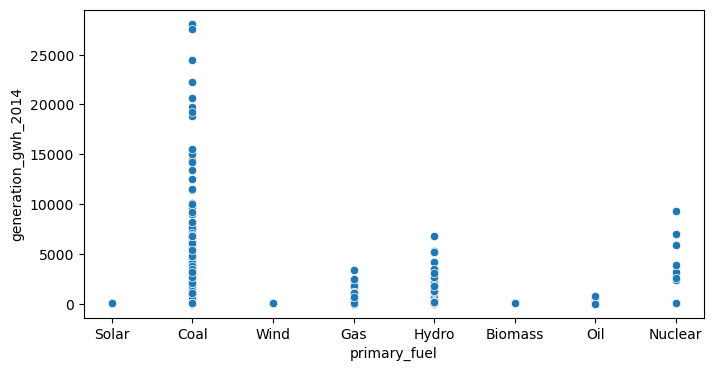

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

Again in 2014 coal was the highest used primary fuel followed by Hydro

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

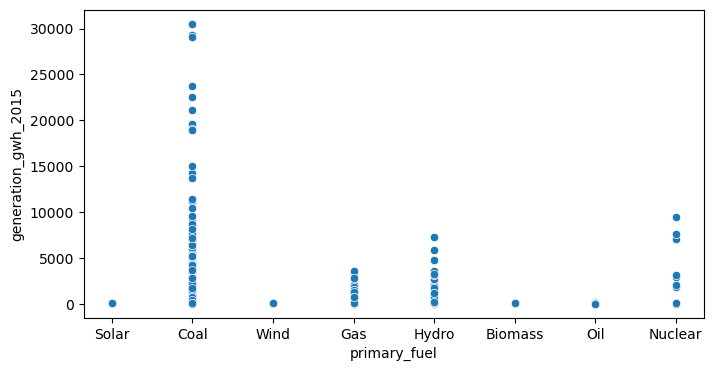

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

Again in 2015 coal was the highest used primary fuel followed by Hydro

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

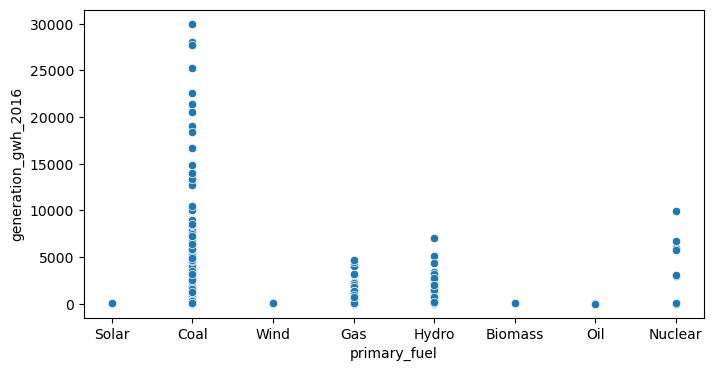

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

Again in 2016 coal was the highest used primary fuel followed by Hydro

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

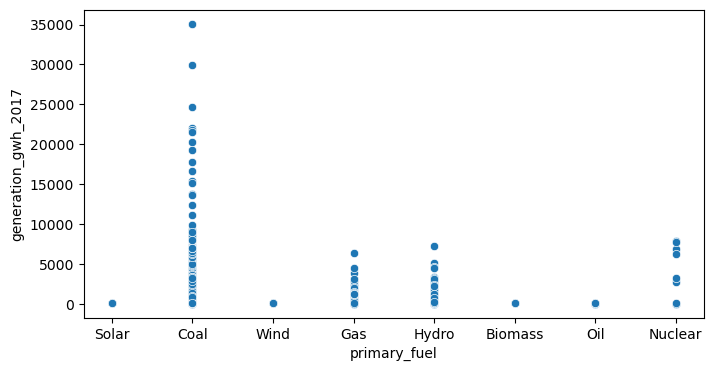

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

in 2017 coal was the highest used primary fuel followed by Hydro and Gas

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

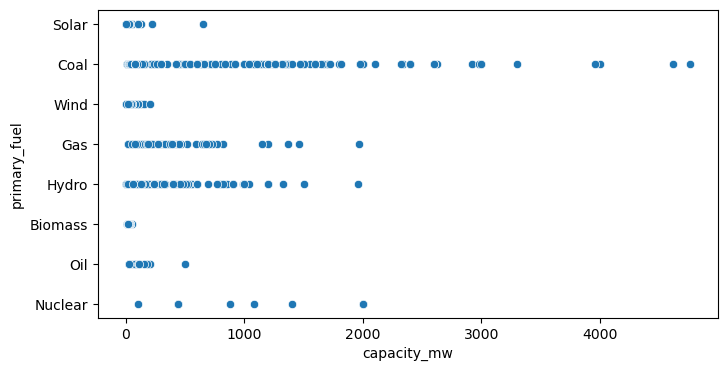

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Here we cam see that Coal is on max capacity in megawatts

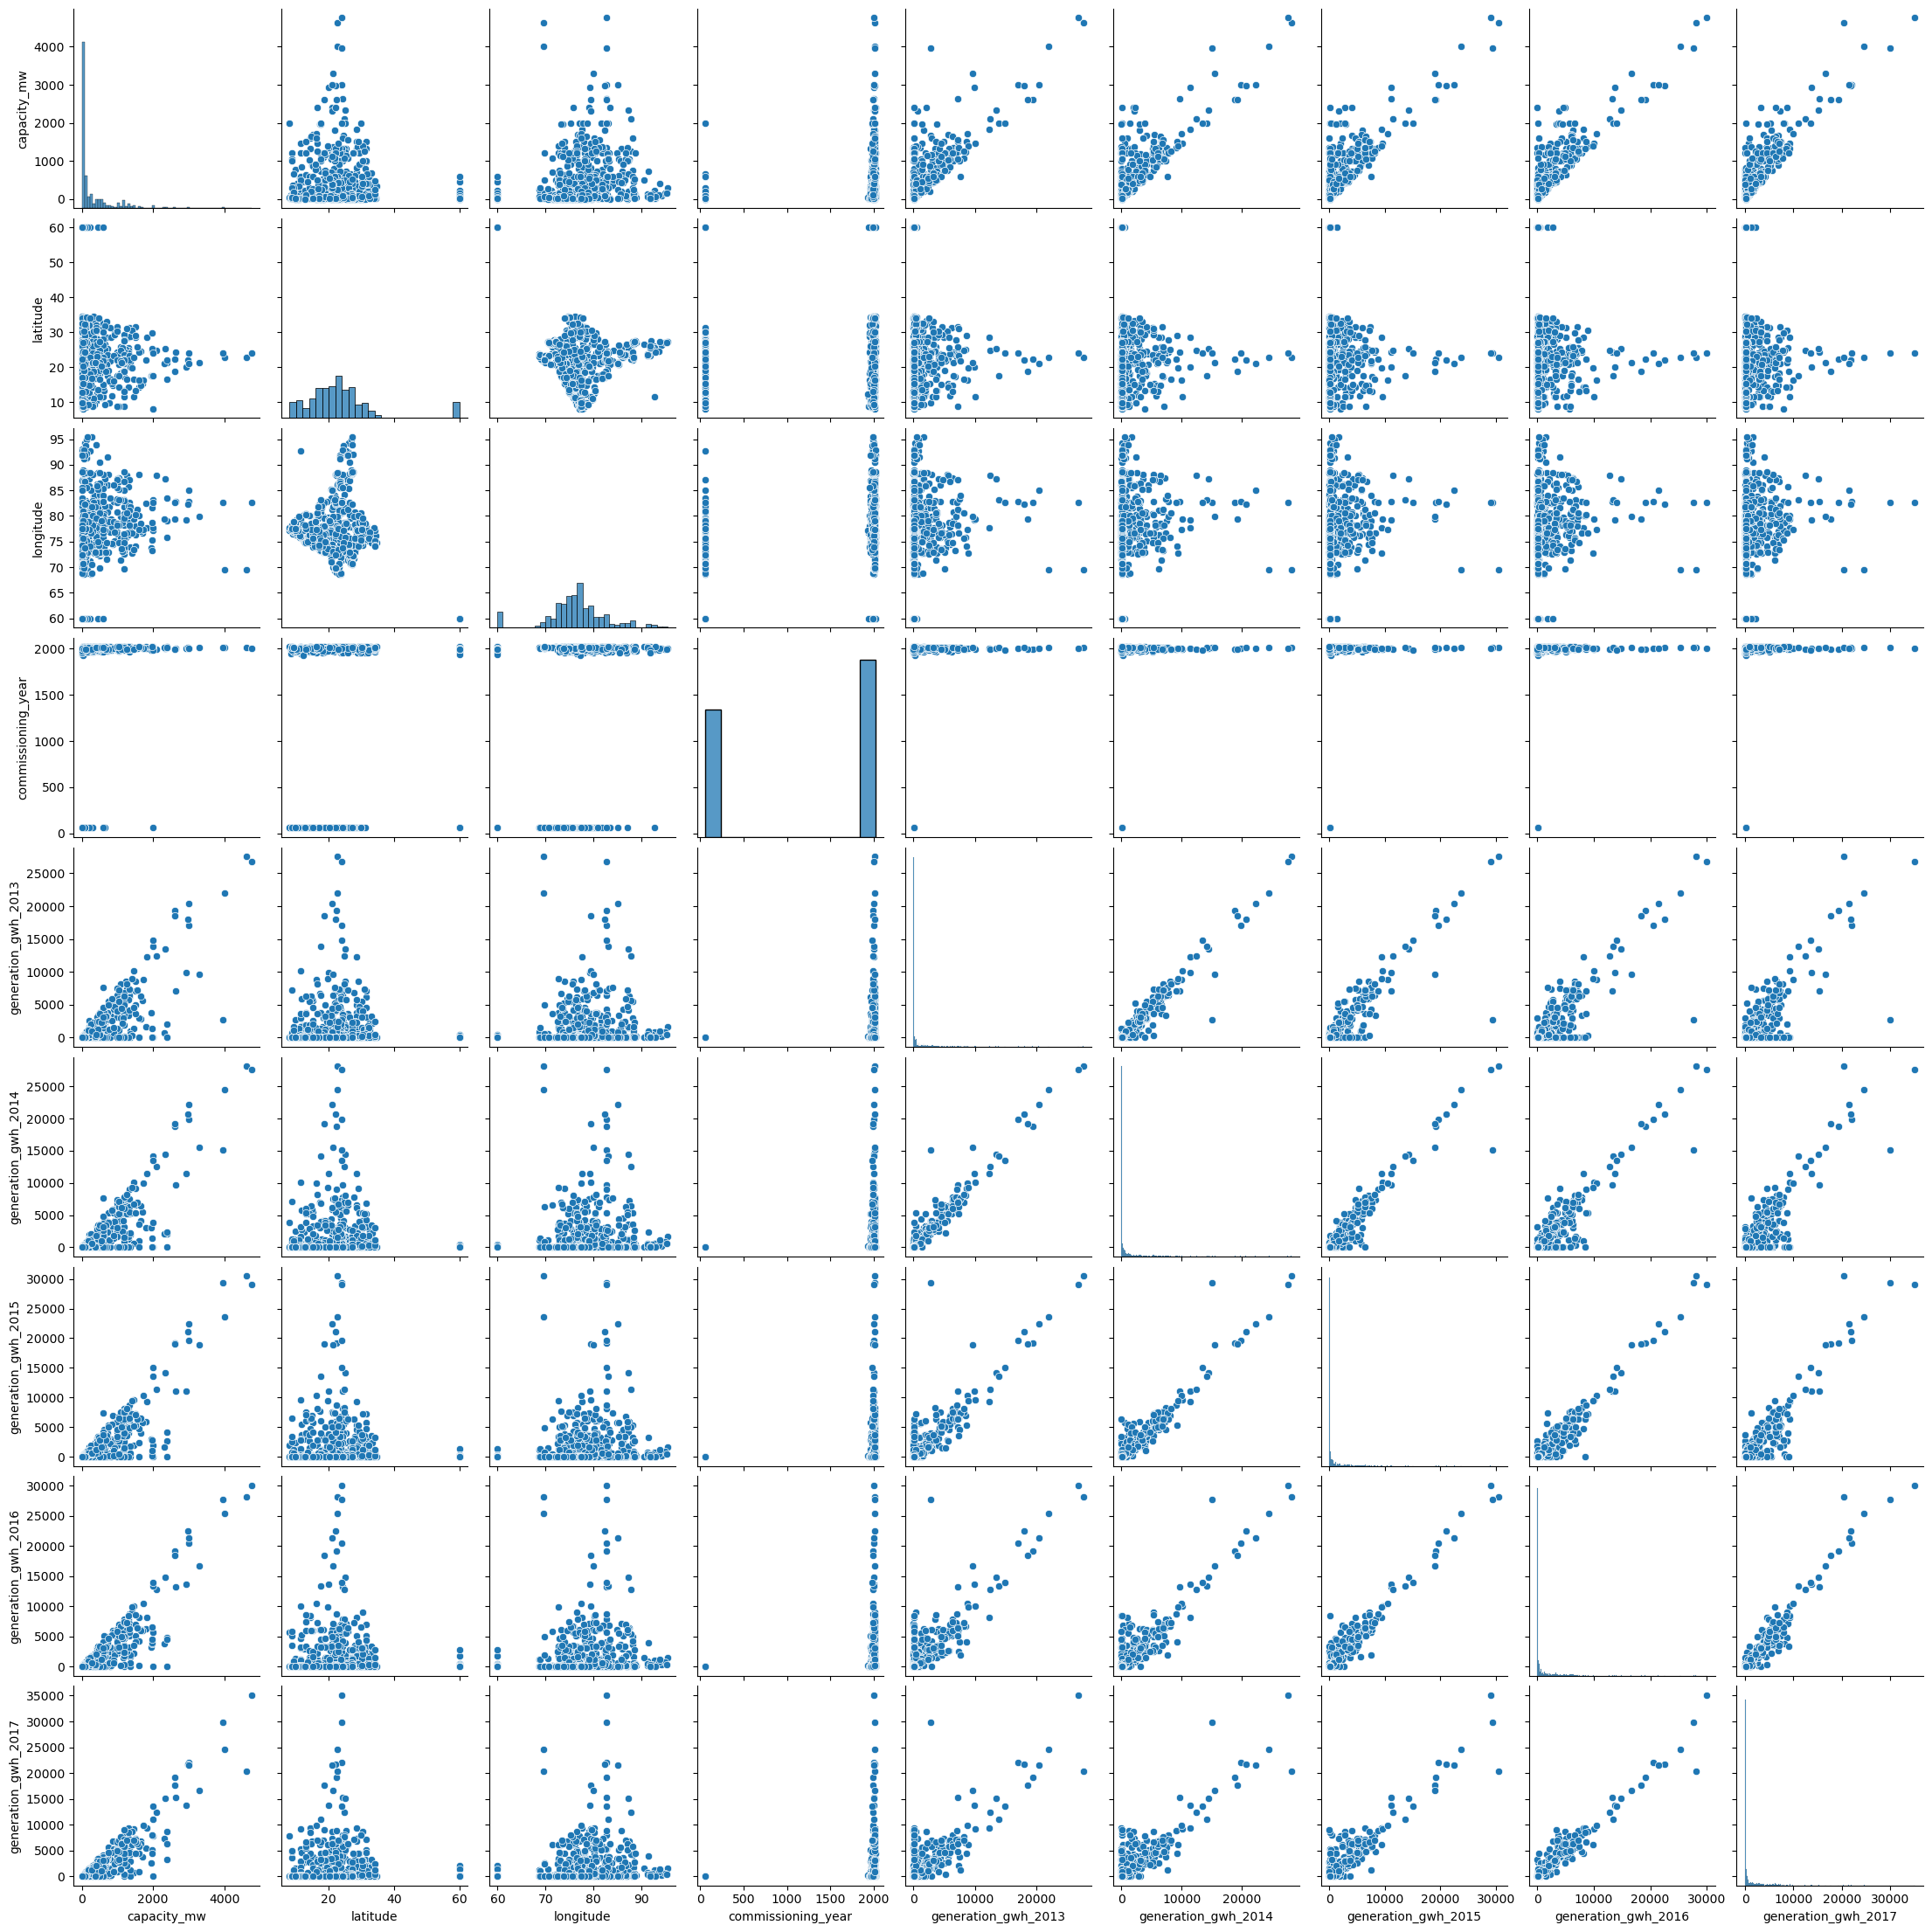

In [41]:
sns.pairplot(data=df)

In [42]:
#Encoding categorical columns
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [43]:
df.dtypes

name                   float64
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel           float64
commissioning_year     float64
source                 float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

Now all the columns have been converted in the numerical 

name                      Axes(0.125,0.712609;0.227941x0.167391)
capacity_mw            Axes(0.398529,0.712609;0.227941x0.167391)
latitude               Axes(0.672059,0.712609;0.227941x0.167391)
longitude                 Axes(0.125,0.511739;0.227941x0.167391)
primary_fuel           Axes(0.398529,0.511739;0.227941x0.167391)
commissioning_year     Axes(0.672059,0.511739;0.227941x0.167391)
source                     Axes(0.125,0.31087;0.227941x0.167391)
generation_gwh_2013     Axes(0.398529,0.31087;0.227941x0.167391)
generation_gwh_2014     Axes(0.672059,0.31087;0.227941x0.167391)
generation_gwh_2015           Axes(0.125,0.11;0.227941x0.167391)
generation_gwh_2016        Axes(0.398529,0.11;0.227941x0.167391)
generation_gwh_2017        Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

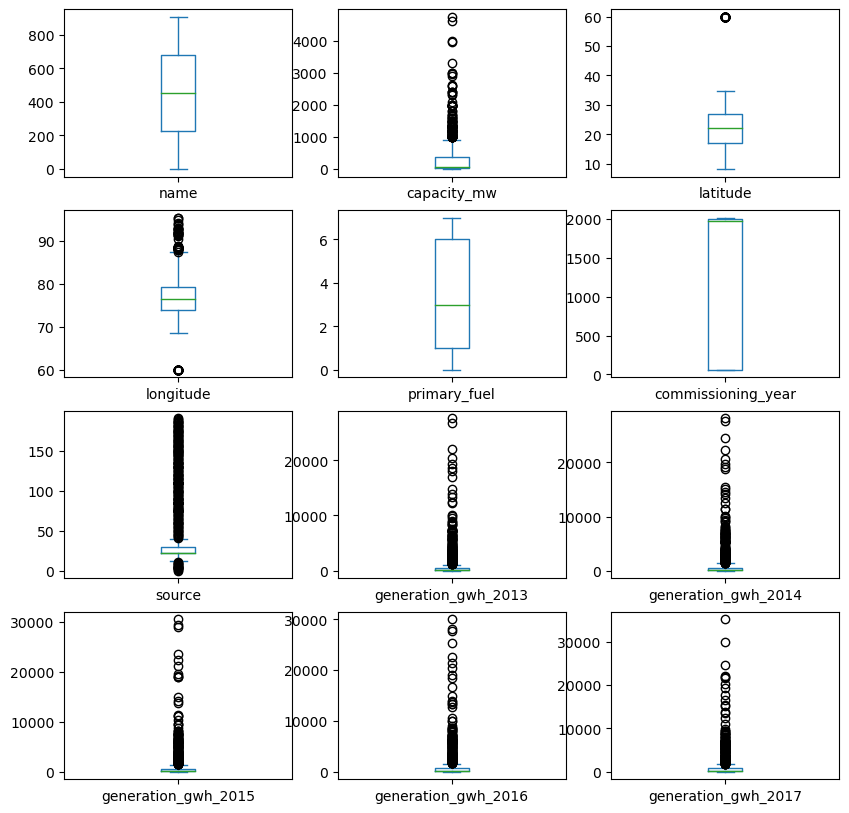

In [44]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

Here we can see the presence of outliers capacity,longitude,generation_gwh 2013,generation_gwh 2014,generation_gwh 2015,generation_gwh 2016,generation_gwh 2017 but we will not remove outliers from capacity_mw as it is our target variable and also we will not remove outliers from source as it is categorical data

In [45]:
#removing outliers 
z=np.abs(zscore(df[['generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','generation_gwh_2013','longitude']]))
z

,generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013,longitude
0,0.380187,0.369767,0.356528,0.358176,0.351176,0.542855
1,0.380187,0.369767,0.356528,0.358176,0.351176,0.319341
2,0.380187,0.369767,0.356528,0.358176,0.351176,1.174618
3,0.189839,0.104671,0.102930,0.166519,0.139597,2.416998
4,1.298775,1.614587,1.538430,0.664223,0.243951,0.954820
...,...,...,...,...,...,...
903,0.126274,0.314053,0.375621,0.358176,0.351176,0.129517
904,0.380187,0.369767,0.356528,0.358176,0.351176,0.261604
905,0.380187,0.369767,0.356528,0.358176,0.351176,0.160546
906,0.380187,0.369767,0.356528,0.358176,0.351176,0.460036


In [46]:
np.where(z>3)

(array([ 15,  15,  15, 144, 144, 144, 144, 144, 159, 159, 210, 210, 210,
        210, 210, 309, 309, 309, 309, 309, 334, 365, 365, 365, 365, 365,
        494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 520, 533, 533,
        624, 649, 649, 649, 649, 649, 658, 658, 658, 658, 658, 696, 696,
        696, 696, 722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
        727, 727, 727, 727, 787, 787, 787, 787, 787, 809, 809, 809, 809,
        809, 881, 881, 881, 881, 881], dtype=int64),
 array([0, 1, 2, 0, 1, 2, 3, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
        1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 3, 4, 3, 0, 1, 2, 3,
        4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))

In [47]:
df1=df[(z<3).all(axis=1)]
df1

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.0,2.5,28.1839,73.2407,6.0,2011.0,109.0,60.000000,60.000000,60.000000,60.000000,60.000000
1,1.0,98.0,24.7663,74.6090,1.0,60.0,174.0,60.000000,60.000000,60.000000,60.000000,60.000000
2,2.0,39.2,21.9038,69.3732,7.0,60.0,21.0,60.000000,60.000000,60.000000,60.000000,60.000000
3,3.0,135.0,23.8712,91.3602,2.0,2004.0,22.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,4.0,1800.0,21.9603,82.4091,1.0,2015.0,22.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,903.0,1600.0,16.2949,77.3568,1.0,2016.0,22.0,60.000000,60.000000,0.994875,233.596650,865.400000
904,904.0,3.0,12.8932,78.1654,6.0,60.0,77.0,60.000000,60.000000,60.000000,60.000000,60.000000
905,905.0,25.5,15.2758,75.5811,7.0,60.0,21.0,60.000000,60.000000,60.000000,60.000000,60.000000
906,906.0,80.0,24.3500,73.7477,1.0,60.0,59.0,60.000000,60.000000,60.000000,60.000000,60.000000


In [48]:
print("Data Loss =",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data Loss = 0.023127753303964757


Since the data loss is small and there are a very few outliers, i choose to remove the outliers and check the model.

In [49]:
#Skewness
df1.skew()

name                   0.011154
capacity_mw            2.196279
latitude               1.972641
longitude             -0.237504
primary_fuel           0.434403
commissioning_year    -0.289269
source                 1.791620
generation_gwh_2013    2.996306
generation_gwh_2014    2.857230
generation_gwh_2015    2.663661
generation_gwh_2016    2.588188
generation_gwh_2017    2.498574
dtype: float64

In [50]:
df1['capacity_mw']=np.cbrt(df1['capacity_mw'])

In [51]:
df1['latitude']=np.cbrt(df1['latitude'])

In [52]:
df1['capacity_mw']=np.cbrt(df1['capacity_mw'])

In [53]:
df1['generation_gwh_2013']=np.cbrt(df1['generation_gwh_2013'])

In [54]:
df1['generation_gwh_2013']=np.cbrt(df1['generation_gwh_2013'])

In [55]:
df1['generation_gwh_2014']=np.cbrt(df1['generation_gwh_2014'])

In [56]:
df1['generation_gwh_2015']=np.cbrt(df1['generation_gwh_2015'])

In [57]:
df1['generation_gwh_2016']=np.cbrt(df1['generation_gwh_2016'])

In [58]:
df1['generation_gwh_2017']=np.cbrt(df1['generation_gwh_2017'])

In [59]:
df1.skew()

name                   0.011154
capacity_mw            0.206709
latitude               0.768381
longitude             -0.237504
primary_fuel           0.434403
commissioning_year    -0.289269
source                 1.791620
generation_gwh_2013   -0.786321
generation_gwh_2014    1.479542
generation_gwh_2015    1.422852
generation_gwh_2016    1.374639
generation_gwh_2017    1.334951
dtype: float64

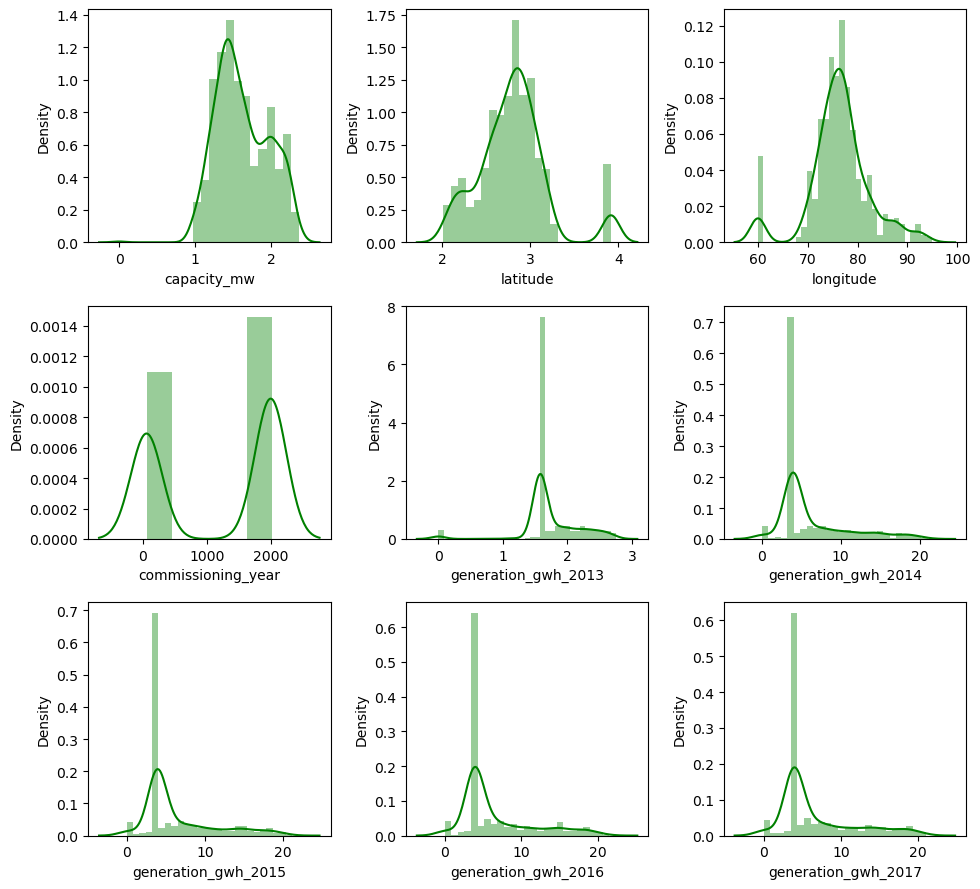

In [60]:
#To check skewness in df after transformation
plt.figure(figsize=(10,9))
plotnumber=1
for col in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above we can see that skewness has reduced.

In [61]:
df1cor=df1.corr()

<Axes: >

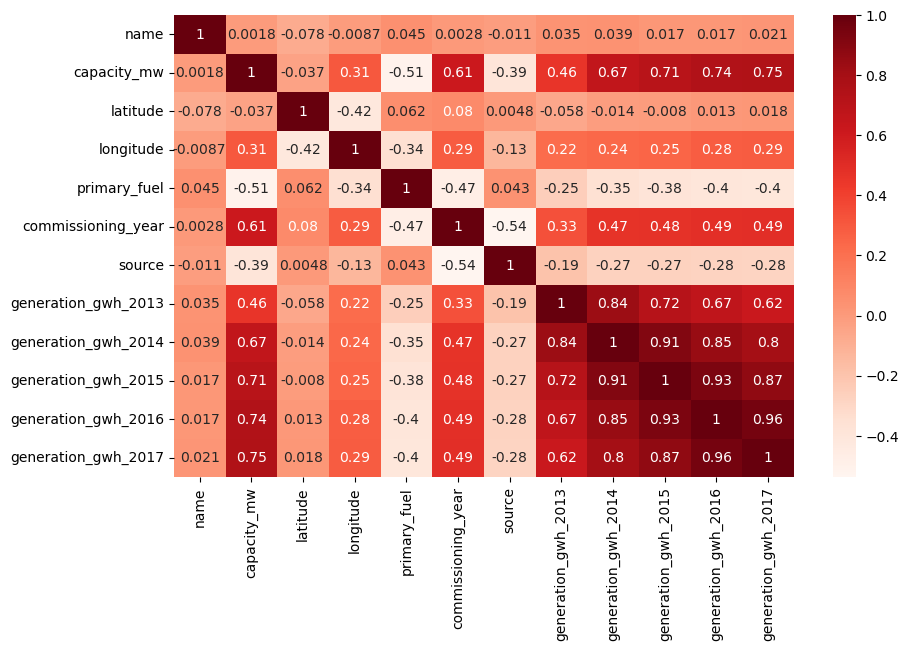

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(df1cor,annot=True,cmap='Reds')

In [63]:
df1cor['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2017    0.751376
generation_gwh_2016    0.744301
generation_gwh_2015    0.711044
generation_gwh_2014    0.668802
commissioning_year     0.612121
generation_gwh_2013    0.463218
longitude              0.305505
name                   0.001804
latitude              -0.037251
source                -0.387912
primary_fuel          -0.513867
Name: capacity_mw, dtype: float64

Above we can see the positive correlation of all columns with capacity_mw

In [64]:
df1cor['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
latitude               0.061633
name                   0.045331
source                 0.043458
generation_gwh_2013   -0.250425
longitude             -0.344605
generation_gwh_2014   -0.350611
generation_gwh_2015   -0.377012
generation_gwh_2016   -0.398565
generation_gwh_2017   -0.399862
commissioning_year    -0.471396
capacity_mw           -0.513867
Name: primary_fuel, dtype: float64

Above we can see the positive correlation of columns with primary_fuel

In [65]:
#Now separating dependent and independent variables for predicting capacity_mw
x=df1.drop('capacity_mw',axis=1)
y=df1['capacity_mw']

In [66]:
#Now separating dependent and independent variables for predicting primary_fuel
x1=df1.drop('primary_fuel',axis=1)
y1=df1['primary_fuel']

In [67]:
print(x.shape)
print(y.shape)

(887, 11)
(887,)


In [68]:
print(x1.shape)
print(y1.shape)

(887, 11)
(887,)


In [69]:
#now we will scale x 
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,name,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.722425,0.637003,-0.526809,1.201991,0.880536,1.436997,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
1,-1.718615,0.304913,-0.300935,-0.988161,-1.154973,2.881560,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
2,-1.714804,0.002361,-1.165242,1.640021,-1.154973,-0.518720,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
3,-1.710993,0.212933,2.464294,-0.550131,0.873233,-0.496496,0.697995,0.486827,0.661380,0.651937,0.428375
4,-1.707183,0.008581,0.986678,-0.988161,0.884709,-0.496496,1.235574,1.820882,2.548060,2.527137,2.248133
...,...,...,...,...,...,...,...,...,...,...,...
882,1.718632,-0.677423,0.152662,-0.988161,0.885753,-0.496496,-0.388068,-0.542852,-1.184696,-0.081625,0.595029
883,1.722443,-1.169955,0.286143,1.201991,-1.154973,0.725827,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
884,1.726253,-0.817132,-0.140464,1.640021,-1.154973,-0.518720,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
885,1.730064,0.262415,-0.443115,-0.988161,-1.154973,0.325794,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333


In [70]:
#now we will scale x1
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,name,capacity_mw,latitude,longitude,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.722425,-1.497445,0.637003,-0.526809,0.880536,1.436997,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
1,-1.718615,0.126862,0.304913,-0.300935,-1.154973,2.881560,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
2,-1.714804,-0.342800,0.002361,-1.165242,-1.154973,-0.518720,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
3,-1.710993,0.302650,0.212933,2.464294,0.873233,-0.496496,0.697995,0.486827,0.661380,0.651937,0.428375
4,-1.707183,1.979396,0.008581,0.986678,0.884709,-0.496496,1.235574,1.820882,2.548060,2.527137,2.248133
...,...,...,...,...,...,...,...,...,...,...,...
882,1.718632,1.892227,-0.677423,0.152662,0.885753,-0.496496,-0.388068,-0.542852,-1.184696,-0.081625,0.595029
883,1.722443,-1.431393,-1.169955,0.286143,-1.154973,0.725827,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
884,1.726253,-0.547251,-0.817132,-0.140464,-1.154973,-0.518720,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333
885,1.730064,0.018680,0.262415,-0.443115,-1.154973,0.325794,-0.388068,-0.542852,-0.547593,-0.559293,-0.565333


In [71]:
#Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,name,1.017009
1,latitude,1.319255
2,longitude,1.504156
3,primary_fuel,1.564806
4,commissioning_year,2.251060
5,source,1.556524
6,generation_gwh_2013,3.541363
7,generation_gwh_2014,10.309016
8,generation_gwh_2015,12.794136
9,generation_gwh_2016,21.153372


Here we can see the multicolinearity present between generation_gwh_2016,generation_gwh_2017 and generation_gwh_2015 so we will drop generation_gwh_2016 as it has the highest VIF value and then we will again check the VIF

In [ ]:
x.drop('generation_gwh_2016',axis=1,inplace=True)

In [78]:
x

,name,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,-1.722425,0.637003,-0.526809,1.201991,0.880536,1.436997,-0.388068,-0.542852,-0.547593,-0.565333
1,-1.718615,0.304913,-0.300935,-0.988161,-1.154973,2.881560,-0.388068,-0.542852,-0.547593,-0.565333
2,-1.714804,0.002361,-1.165242,1.640021,-1.154973,-0.518720,-0.388068,-0.542852,-0.547593,-0.565333
3,-1.710993,0.212933,2.464294,-0.550131,0.873233,-0.496496,0.697995,0.486827,0.661380,0.428375
4,-1.707183,0.008581,0.986678,-0.988161,0.884709,-0.496496,1.235574,1.820882,2.548060,2.248133
...,...,...,...,...,...,...,...,...,...,...
882,1.718632,-0.677423,0.152662,-0.988161,0.885753,-0.496496,-0.388068,-0.542852,-1.184696,0.595029
883,1.722443,-1.169955,0.286143,1.201991,-1.154973,0.725827,-0.388068,-0.542852,-0.547593,-0.565333
884,1.726253,-0.817132,-0.140464,1.640021,-1.154973,-0.518720,-0.388068,-0.542852,-0.547593,-0.565333
885,1.730064,0.262415,-0.443115,-0.988161,-1.154973,0.325794,-0.388068,-0.542852,-0.547593,-0.565333


In [80]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,name,1.016980
1,latitude,1.317303
2,longitude,1.503417
3,primary_fuel,1.563315
4,commissioning_year,2.249807
5,source,1.556318
6,generation_gwh_2013,3.527250
7,generation_gwh_2014,10.260003
8,generation_gwh_2015,9.084923
9,generation_gwh_2017,4.429884


In [81]:
x.drop("generation_gwh_2014",axis=1,inplace=True)

In [82]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,name,1.014597
1,latitude,1.317279
2,longitude,1.500126
3,primary_fuel,1.563125
4,commissioning_year,2.225754
5,source,1.556224
6,generation_gwh_2013,2.113732
7,generation_gwh_2015,5.388829
8,generation_gwh_2017,4.422026


In [ ]:
Now we will check vif for x1

In [83]:
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,name,1.014319
1,capacity_mw,3.014800
2,latitude,1.329105
3,longitude,1.460607
4,commissioning_year,2.094880
5,source,1.431905
6,generation_gwh_2013,3.644844
7,generation_gwh_2014,10.473379
8,generation_gwh_2015,12.802093
9,generation_gwh_2016,21.177826


In [84]:
x1.drop('generation_gwh_2016',axis=1,inplace=True)

In [85]:
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,name,1.014285
1,capacity_mw,3.008450
2,latitude,1.326829
3,longitude,1.459601
4,commissioning_year,2.093455
5,source,1.431899
6,generation_gwh_2013,3.627576
7,generation_gwh_2014,10.416417
8,generation_gwh_2015,9.109952
9,generation_gwh_2017,4.973373


In [86]:
x1.drop("generation_gwh_2014",axis=1,inplace=True)

In [87]:
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,name,1.011626
1,capacity_mw,2.962913
2,latitude,1.326511
3,longitude,1.455981
4,commissioning_year,2.082573
5,source,1.431829
6,generation_gwh_2013,2.140974
7,generation_gwh_2015,5.551356
8,generation_gwh_2017,4.973360


# MODEL BUILDING TO PREDICT CAPACITY_MW

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [90]:
#Now we find the best random state with x and y
maxRS=0
maxaccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Maximum r2 score is ",maxaccu, "at random state ",maxRS)

Maximum r2 score is  0.7946524210895368 at random state  4


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

In [94]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_Score : ",r2_score(y_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_LR)) )

LinearRegression()
R2_Score :  0.7946524210895368
R2_Score on Training Data : 0.646459873113039
Mean Absolute Error: 0.12443060312158916
Mean Squared Error: 0.02499214339845307
Root Mean Squared Error: 0.15808903630060203


In [95]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_Score : ",r2_score(y_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)) )


RandomForestRegressor()
R2_Score :  0.8802491948766095
R2_Score on Training Data : 0.9699923707623646
Mean Absolute Error: 0.08639813194113824
Mean Squared Error: 0.014574456195701893
Root Mean Squared Error: 0.12072471244820546


In [108]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print(KNR)
print("R2_Score : ",r2_score(y_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_KNR)) )

KNeighborsRegressor()
R2_Score :  0.7915163063676723
R2_Score on Training Data : 0.8154015289722032
Mean Absolute Error: 0.1133149790690419
Mean Squared Error: 0.02537382907139208
Root Mean Squared Error: 0.15929164783940206


In [98]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_Score : ",r2_score(y_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.8767296864825317
R2_Score on Training Data : 0.9074173622239927
Mean Absolute Error: 0.09342570531345275
Mean Squared Error: 0.015002803386078092
Root Mean Squared Error: 0.12248593138021237


In [99]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_Score : ",r2_score(y_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_svr)) )

SVR()
R2_Score :  0.8337794649403204
R2_Score on Training Data : 0.8262275049440633
Mean Absolute Error: 0.10250489051228617
Mean Squared Error: 0.020230126257249178
Root Mean Squared Error: 0.1422326483520896


In [100]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_Score : ",r2_score(y_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)) )

Lasso()
R2_Score :  -0.009374434972022394
R2_Score on Training Data : 0.0
Mean Absolute Error: 0.2932898496579496
Mean Squared Error: 0.12284747039823973
Root Mean Squared Error: 0.3504960347824776


In [101]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print(ridge)
print("R2_Score : ",r2_score(y_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ridge)) )

Ridge()
R2_Score :  0.7945937727849999
R2_Score on Training Data : 0.6464590018302987
Mean Absolute Error: 0.12444332781827258
Mean Squared Error: 0.02499928128069565
Root Mean Squared Error: 0.15811161020208367


In [102]:
EN=ElasticNet()
EN.fit(x_train,y_train)
pred_EN=EN.predict(x_test)
pred_train=EN.predict(x_train)
print(EN)
print("R2_Score : ",r2_score(y_test,pred_EN))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_EN))
print("Mean Squared Error:", mean_squared_error(y_test,pred_EN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_EN)) )

ElasticNet()
R2_Score :  -0.009374434972022394
R2_Score on Training Data : 0.0
Mean Absolute Error: 0.2932898496579496
Mean Squared Error: 0.12284747039823973
Root Mean Squared Error: 0.3504960347824776


In [103]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_Score : ",r2_score(y_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_dtr)) )

DecisionTreeRegressor()
R2_Score :  0.7853816564543836
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.11934010566409024
Mean Squared Error: 0.026120456088597234
Root Mean Squared Error: 0.1616182418187911


In [104]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
pred_train=ad.predict(x_train)
print(ad)
print("R2_Score : ",r2_score(y_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.8162095979693328
R2_Score on Training Data : 0.7862045489179447
Mean Absolute Error: 0.12155207959839247
Mean Squared Error: 0.022368493980698834
Root Mean Squared Error: 0.14956100421132118


In [105]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
pred_train=br.predict(x_train)
print(br)
print("R2_Score : ",r2_score(y_test,pred_br))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_br)))

BaggingRegressor()
R2_Score :  0.873710246022529
R2_Score on Training Data : 0.9501425953218234
Mean Absolute Error: 0.09010433352225425
Mean Squared Error: 0.015370289038258012
Root Mean Squared Error: 0.12397696978978802


In [106]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print("R2_Score : ",r2_score(y_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.8811473940235632
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.08748429481939929
Mean Squared Error: 0.014465139484980776
Root Mean Squared Error: 0.1202711082720234


In [109]:
R2_Score=pd.DataFrame([['etr',r2_score(y_test,pred_etr)],['LR',r2_score(y_test,pred_LR)],['BR',r2_score(y_test,pred_br)],['ADR',r2_score(y_test,pred_ad)],['SVR',r2_score(y_test,pred_svr)],['DTR',r2_score(y_test,pred_dtr)],['EN',r2_score(y_test,pred_EN)],['Ridge',r2_score(y_test,pred_ridge)],['Lasso',r2_score(y_test,pred_lasso)],['GBR',r2_score(y_test,pred_GBR)],['KNR',r2_score(y_test,pred_KNR)],['RFR',r2_score(y_test,pred_RFR)]],columns=['Model','R2_Score'])
R2_Score

,Model,R2_Score
0,etr,0.881147
1,LR,0.794652
2,BR,0.873710
3,ADR,0.816210
4,SVR,0.833779
5,DTR,0.785382
6,EN,-0.009374
7,Ridge,0.794594
8,Lasso,-0.009374
9,GBR,0.876730


Above we can see that we are getting the highest r2 score in Extra Trees Regressor. Now we will validate the same with cross val score

In [110]:
#Now we will check all models with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y_test,pred_LR)-score_LR.mean())*100)

0.7946524210895368
[0.70115226 0.67028228 0.66310485 0.71018969 0.64323937]
0.6775936904194304
Difference between r2 score and Cross Val Score for Linear regression is : 11.705873067010641


In [111]:
score_RFR=cvs(RFR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y_test,pred_RFR)-score_RFR.mean())*100)

0.8810979521071369
[0.76955959 0.81217057 0.7942667  0.85352701 0.76397707]
0.7987001889191709
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 8.239776318796599


In [112]:
score_KNR=cvs(KNR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_KNR))
print(score_KNR)
print(score_KNR.mean())
print("Difference between r2 score and Cross Val Score for KNeighborsRegressor is :", (r2_score(y_test,pred_KNR)-score_KNR.mean())*100)

0.7915163063676723
[0.73439882 0.74594224 0.76336438 0.78236006 0.66592547]
0.7383981954692898
Difference between r2 score and Cross Val Score for KNeighborsRegressor is : 5.311811089838258


In [113]:
score_GBR=cvs(GBR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y_test,pred_GBR)-score_GBR.mean())*100)

0.8767296864825317
[0.78004302 0.82931896 0.80934659 0.83231546 0.75369262]
0.8009433297977158
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 7.578635668481592


In [114]:
score_svr=cvs(svr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y_test,pred_svr)-score_svr.mean())*100)

0.8337794649403204
[0.73938362 0.78489359 0.75404195 0.82713699 0.67311845]
0.755714920981015
Difference between r2 score and Cross Val Score for SVR is : 7.80645439593054


In [115]:
score_lasso=cvs(lasso,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y_test,pred_lasso)-score_lasso.mean())*100)

-0.009374434972022394
[-8.20213348e-06 -2.11986464e-06 -3.87627491e-04 -1.31954636e-02
 -7.04762849e-03]
-0.004128208316948312
Difference between r2 score and Cross Val Score for Lasso is : -0.5246226655074082


In [116]:
score_ridge=cvs(ridge,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y_test,pred_ridge)-score_ridge.mean())*100)

0.7945937727849999
[0.70114338 0.67050328 0.66301698 0.71024956 0.64325397]
0.6776334356702739
Difference between r2 score and Cross Val Score for Ridge is : 11.696033711472598


In [117]:
score_dtr=cvs(dtr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y_test,pred_dtr)-score_dtr.mean())*100)

0.7853816564543836
[0.52184642 0.70884841 0.62404934 0.68540377 0.59000136]
0.626029858974986
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 15.935179747939765


In [118]:
score_ad=cvs(ad,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y_test,pred_ad)-score_ad.mean())*100)

0.8162095979693328
[0.75155733 0.74810279 0.73378465 0.80777302 0.73096744]
0.7544370438362354
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : 6.177255413309735


In [119]:
score_br=cvs(br,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y_test,pred_br)-score_br.mean())*100)

0.873710246022529
[0.76376029 0.81770044 0.78297091 0.84163275 0.74225398]
0.789663673051886
Difference between r2 score and Cross Val Score for BaggingRegressor is : 8.4046572970643


In [120]:
score_etr=cvs(etr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y_test,pred_etr)-score_etr.mean())*100)

0.8811473940235632
[0.77215145 0.80338989 0.79942911 0.86136696 0.78893628]
0.8050547371614145
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 7.609265686214872


Observation: Above we can clearly see that Extra Trees Regression has highest r2 score as well as cross val score. Moreover, the difference between both the scores is also less. Hence we can say that ETR is our best model. r2 Score=0.8811473940235632.CV Score mean=0.8050547371614145 Difference between r2 score and Cross Val Score for ETR is  7.609265686214872

HYPERPARAMETER TUNING

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params={'criterion':['squared_error','absolute_error','friedman_mse','poisson'],'n_estimators':[50,100,200,300],'random_state':[10,16,42,50,100,120]}

In [123]:
GCV=GridSearchCV(etr,params,cv=5)

In [124]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 16, 42, 50, 100, 120]})

In [126]:
GCV.best_params_

{'criterion': 'absolute_error', 'n_estimators': 300, 'random_state': 100}

In [130]:
Final_model=ExtraTreesRegressor(criterion='absolute_error',n_estimators=300, random_state=100)
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
print("R2_Score : ",r2_score(y_test,finalpred))
print("Mean Absolute Error:", mean_absolute_error(y_test,finalpred))
print("Mean Squared Error:", mean_squared_error(y_test,finalpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,finalpred)))

R2_Score :  0.8830905722601772
Mean Absolute Error: 0.0854814296955249
Mean Squared Error: 0.014228641984518968
Root Mean Squared Error: 0.11928387143498893


SAVING BEST MODEL

In [131]:
import joblib
import pickle
filename='Global power plant capacity.pkl'
pickle.dump(Final_model,open(filename,'wb'))
loaded_model=pickle.load(open('Global power plant capacity.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)


88.30905722601771


In [132]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [133]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
Predicted,1.390585,1.870041,1.320195,1.272991,2.060231,1.326227,1.241742,1.446067,2.030366,1.700438,...,1.597854,1.233252,2.187359,2.030886,1.581845,1.535875,1.513573,1.670781,1.087755,1.571498
Original,1.393394,1.969406,1.402534,1.158194,2.035558,1.394951,1.141859,1.475759,2.106419,1.648686,...,1.544452,1.291550,2.225646,1.994737,1.702237,1.459233,1.537463,1.596820,1.000000,1.495865


Above we can see that our predicted value is quite close to the original value

Now we will prepare the model for predictgion of primary fuel

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [137]:
#finding best random state in dfn
maxAccu1=0
maxRS1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.25,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x1_train,y1_train)
    pred=RFR.predict(x1_test)
    accu1=accuracy_score(y1_test,pred)
    if accu1>maxAccu1:
        maxAccu1=accu1
        maxRS1=i
print("Best Accuracy is",maxAccu1,"at random state", maxRS1)

Best Accuracy is 0.8738738738738738 at random state 109


Creating train_test_split

In [150]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=maxRS1)

RANDOM FOREST CLASSIFIER

In [151]:
RFC=RandomForestClassifier()
RFC.fit(x1_train,y1_train)
predRFC=RFC.predict(x1_test)
predRFC
print(accuracy_score(y1_test,predRFC))
print(confusion_matrix(y1_test,predRFC))
print(classification_report(y1_test,predRFC))

0.8783783783783784
[[10  0  0  0  0  0  0]
 [ 1 54  0  4  1  1  1]
 [ 0  5  5  2  1  0  0]
 [ 0  3  0 62  0  0  0]
 [ 1  0  3  1  2  0  0]
 [ 0  3  0  0  0 29  0]
 [ 0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        10
         1.0       0.83      0.87      0.85        62
         2.0       0.62      0.38      0.48        13
         3.0       0.90      0.95      0.93        65
         5.0       0.50      0.29      0.36         7
         6.0       0.97      0.91      0.94        32
         7.0       0.97      1.00      0.99        33

    accuracy                           0.88       222
   macro avg       0.80      0.77      0.78       222
weighted avg       0.87      0.88      0.87       222



LOGISTIC REGRESSION

In [152]:
LR=LogisticRegression()
LR.fit(x1_train,y1_train)
predLR=LR.predict(x1_test)
predLR
print(accuracy_score(y1_test,predLR))
print(confusion_matrix(y1_test,predLR))
print(classification_report(y1_test,predLR))

0.7522522522522522
[[ 4  0  0  0  0  4  2]
 [ 1 42  1 11  0  5  2]
 [ 0  4  1  7  0  1  0]
 [ 0  4  0 61  0  0  0]
 [ 0  1  2  1  0  2  1]
 [ 1  1  0  0  0 27  3]
 [ 0  0  0  0  0  1 32]]
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.81      0.68      0.74        62
         2.0       0.25      0.08      0.12        13
         3.0       0.76      0.94      0.84        65
         5.0       0.00      0.00      0.00         7
         6.0       0.68      0.84      0.75        32
         7.0       0.80      0.97      0.88        33

    accuracy                           0.75       222
   macro avg       0.57      0.56      0.55       222
weighted avg       0.71      0.75      0.72       222



GAUSSIAN NAIVE BAYES

In [153]:
gnb=GaussianNB()
gnb.fit(x1_train,y1_train)
predgnb=gnb.predict(x1_test)
predgnb
print(accuracy_score(y1_test,predgnb))
print(confusion_matrix(y1_test,predgnb))
print(classification_report(y1_test,predgnb))

0.45495495495495497
[[10  0  0  0  0  0  0  0]
 [14  0  0 43  3  0  2  0]
 [ 1  0  0 12  0  0  0  0]
 [ 0  0  0 43  1  0 21  0]
 [ 0  0  0  0  0  0  0  0]
 [ 4  0  0  3  0  0  0  0]
 [17  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.22      1.00      0.36        10
         1.0       0.00      0.00      0.00        62
         2.0       0.00      0.00      0.00        13
         3.0       0.43      0.66      0.52        65
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         7
         6.0       0.39      0.47      0.43        32
         7.0       1.00      1.00      1.00        33

    accuracy                           0.45       222
   macro avg       0.25      0.39      0.29       222
weighted avg       0.34      0.45      0.38       222



KNN CLASSIFIER

In [154]:
KNN=KNeighborsClassifier()
KNN.fit(x1_train,y1_train)
predKNN=KNN.predict(x1_test)
predKNN
print(accuracy_score(y1_test,predKNN))
print(confusion_matrix(y1_test,predKNN))
print(classification_report(y1_test,predKNN))

0.7657657657657657
[[ 9  0  0  0  0  0  1]
 [ 3 45  2  8  0  2  2]
 [ 1  3  4  5  0  0  0]
 [ 0  1  3 61  0  0  0]
 [ 2  0  3  1  0  0  1]
 [ 2  4  0  2  0 21  3]
 [ 2  1  0  0  0  0 30]]
              precision    recall  f1-score   support

         0.0       0.47      0.90      0.62        10
         1.0       0.83      0.73      0.78        62
         2.0       0.33      0.31      0.32        13
         3.0       0.79      0.94      0.86        65
         5.0       0.00      0.00      0.00         7
         6.0       0.91      0.66      0.76        32
         7.0       0.81      0.91      0.86        33

    accuracy                           0.77       222
   macro avg       0.59      0.63      0.60       222
weighted avg       0.76      0.77      0.75       222



SUPPORT VECTOR MACHINE CLASSIFIER

In [155]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc=svc.predict(x1_test)
predsvc
print(accuracy_score(y1_test,predsvc))
print(confusion_matrix(y1_test,predsvc))
print(classification_report(y1_test,predsvc))

0.7792792792792793
[[ 7  0  0  0  0  1  2]
 [ 1 43  1 10  1  4  2]
 [ 0  4  2  6  0  1  0]
 [ 0  2  0 63  0  0  0]
 [ 1  1  2  0  1  1  1]
 [ 2  1  0  0  0 24  5]
 [ 0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        10
         1.0       0.84      0.69      0.76        62
         2.0       0.40      0.15      0.22        13
         3.0       0.80      0.97      0.88        65
         5.0       0.50      0.14      0.22         7
         6.0       0.77      0.75      0.76        32
         7.0       0.77      1.00      0.87        33

    accuracy                           0.78       222
   macro avg       0.67      0.63      0.63       222
weighted avg       0.76      0.78      0.76       222



DECISION TREE CLASSIFIER

In [156]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
preddtc=dtc.predict(x1_test)
preddtc
print(accuracy_score(y1_test,preddtc))
print(confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))

0.8108108108108109
[[ 6  1  1  0  0  2  0]
 [ 2 47  1  8  1  3  0]
 [ 0  4  6  2  1  0  0]
 [ 0  2  2 59  2  0  0]
 [ 0  1  4  1  1  0  0]
 [ 1  3  0  0  0 28  0]
 [ 0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.81      0.76      0.78        62
         2.0       0.43      0.46      0.44        13
         3.0       0.84      0.91      0.87        65
         5.0       0.20      0.14      0.17         7
         6.0       0.85      0.88      0.86        32
         7.0       1.00      1.00      1.00        33

    accuracy                           0.81       222
   macro avg       0.69      0.68      0.68       222
weighted avg       0.81      0.81      0.81       222



ADABOOST CLASSIFIER

In [157]:
ad=AdaBoostClassifier()
ad.fit(x1_train,y1_train)
predad=ad.predict(x1_test)
predad
print(accuracy_score(y1_test,predad))
print(confusion_matrix(y1_test,predad))
print(classification_report(y1_test,predad))

0.42342342342342343
[[ 0  0  0  0  0  0 10  0]
 [ 0  3  0 40  6  0 13  0]
 [ 0  0  0 10  2  0  1  0]
 [ 0  0  0 64  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  3  0  0  3  0]
 [ 0  5  0  0  0  0 27  0]
 [ 0 33  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.07      0.05      0.06        62
         2.0       0.00      0.00      0.00        13
         3.0       0.55      0.98      0.70        65
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         7
         6.0       0.50      0.84      0.63        32
         7.0       0.00      0.00      0.00        33

    accuracy                           0.42       222
   macro avg       0.14      0.23      0.17       222
weighted avg       0.25      0.42      0.31       222



GRADIENT BOOSTING CLASSIFIER

In [158]:
gb=GradientBoostingClassifier()
gb.fit(x1_train,y1_train)
predgb=gb.predict(x1_test)
predgb
print(accuracy_score(y1_test,predgb))
print(confusion_matrix(y1_test,predgb))
print(classification_report(y1_test,predgb))

0.8648648648648649
[[ 9  0  0  0  0  1  0]
 [ 1 52  3  3  2  1  0]
 [ 1  2  7  3  0  0  0]
 [ 0  5  0 60  0  0  0]
 [ 0  0  4  1  2  0  0]
 [ 0  3  0  0  0 29  0]
 [ 0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        10
         1.0       0.84      0.84      0.84        62
         2.0       0.50      0.54      0.52        13
         3.0       0.90      0.92      0.91        65
         5.0       0.50      0.29      0.36         7
         6.0       0.94      0.91      0.92        32
         7.0       1.00      1.00      1.00        33

    accuracy                           0.86       222
   macro avg       0.78      0.77      0.77       222
weighted avg       0.86      0.86      0.86       222



BAGGING CLASSIFIER

In [159]:
BC=BaggingClassifier()
BC.fit(x1_train,y1_train)
predBC=BC.predict(x1_test)
predBC
print(accuracy_score(y1_test,predBC))
print(confusion_matrix(y1_test,predBC))
print(classification_report(y1_test,predBC))

0.8513513513513513
[[ 9  0  0  0  0  1  0]
 [ 2 51  3  3  1  2  0]
 [ 0  6  5  2  0  0  0]
 [ 0  5  0 60  0  0  0]
 [ 0  1  2  1  3  0  0]
 [ 1  3  0  0  0 28  0]
 [ 0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.77      0.82      0.80        62
         2.0       0.50      0.38      0.43        13
         3.0       0.91      0.92      0.92        65
         5.0       0.75      0.43      0.55         7
         6.0       0.90      0.88      0.89        32
         7.0       1.00      1.00      1.00        33

    accuracy                           0.85       222
   macro avg       0.80      0.76      0.77       222
weighted avg       0.85      0.85      0.85       222



EXTRA TREES CLASSIFIER

In [160]:
ET=ExtraTreesClassifier()
ET.fit(x1_train,y1_train)
predET=ET.predict(x1_test)
predET
print(accuracy_score(y1_test,predET))
print(confusion_matrix(y1_test,predET))
print(classification_report(y1_test,predET))

0.8783783783783784
[[10  0  0  0  0  0  0]
 [ 0 53  0  5  1  2  1]
 [ 0  4  7  2  0  0  0]
 [ 0  3  0 62  0  0  0]
 [ 1  1  3  1  1  0  0]
 [ 0  2  0  0  0 29  1]
 [ 0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       0.84      0.85      0.85        62
         2.0       0.70      0.54      0.61        13
         3.0       0.89      0.95      0.92        65
         5.0       0.50      0.14      0.22         7
         6.0       0.94      0.91      0.92        32
         7.0       0.94      1.00      0.97        33

    accuracy                           0.88       222
   macro avg       0.82      0.77      0.78       222
weighted avg       0.87      0.88      0.87       222



In [161]:
accuracy=pd.DataFrame([['RFC',accuracy_score(y1_test,predRFC)],['LR',accuracy_score(y1_test,predLR)],['GNB',accuracy_score(y1_test,predgnb)],['KNN',accuracy_score(y1_test,predKNN)],['SVC',accuracy_score(y1_test,predsvc)],['DTC',accuracy_score(y1_test,preddtc)],['Adaboost',accuracy_score(y1_test,predad)],['Gradient Boosting',accuracy_score(y1_test,predgb)],['Bagging',accuracy_score(y1_test,predBC)],['ETC',accuracy_score(y1_test,predET)]],columns=['Model','Accuracy'])
accuracy

,Model,Accuracy
0,RFC,0.878378
1,LR,0.752252
2,GNB,0.454955
3,KNN,0.765766
4,SVC,0.779279
5,DTC,0.810811
6,Adaboost,0.423423
7,Gradient Boosting,0.864865
8,Bagging,0.851351
9,ETC,0.878378


Above we can see that Extra Trees Classifier  and Random forest classifier are giving the highest accuracy. We will validate this with Cross Validation Score

CROSS VALIDATION SCORE

In [162]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predRFC)-score.mean())

[0.80337079 0.8258427  0.89265537 0.8079096  0.79661017]
0.8252777248778009
0.03505270365374958
Difference between Accuracy Score and Cross Validation Score is :  0.053100653500577466


In [163]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predLR)-score.mean())

[0.70786517 0.69662921 0.75141243 0.70056497 0.66666667]
0.7046276899638164
0.02727934641695661
Difference between Accuracy Score and Cross Validation Score is :  0.04762456228843581


In [164]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score=cross_val_score(gnb,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predgnb)-score.mean())

[0.53370787 0.51685393 0.46892655 0.50282486 0.42372881]
0.4892084047483019
0.03906101727333433
Difference between Accuracy Score and Cross Validation Score is :  -0.034253449793346935


In [165]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predKNN)-score.mean())

[0.70786517 0.68539326 0.68926554 0.70621469 0.67231638]
0.6922110074271568
0.013357465316210525
Difference between Accuracy Score and Cross Validation Score is :  0.07355475833860892


In [166]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predsvc)-score.mean())

[0.68539326 0.73595506 0.74576271 0.72316384 0.70056497]
0.718167968006094
0.022301821515232207
Difference between Accuracy Score and Cross Validation Score is :  0.061111311273185365


In [167]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,preddtc)-score.mean())

[0.73595506 0.7247191  0.82485876 0.72881356 0.68361582]
0.7395924585793182
0.046377490099343756
Difference between Accuracy Score and Cross Validation Score is :  0.07121835223149264


In [168]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predad)-score.mean())

[0.43820225 0.31460674 0.41242938 0.23163842 0.4180791 ]
0.3629911762838824
0.07839658224993472
Difference between Accuracy Score and Cross Validation Score is :  0.06043224713954104


In [169]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(gb,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predgb)-score.mean())

[0.8258427  0.84831461 0.85310734 0.80225989 0.8079096 ]
0.8274868279057956
0.020555177639365835
Difference between Accuracy Score and Cross Validation Score is :  0.03737803695906927


In [170]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predET)-score.mean())

[0.7752809  0.80337079 0.83050847 0.77966102 0.80225989]
0.7982162127848664
0.019778953560531574
Difference between Accuracy Score and Cross Validation Score is :  0.08016216559351197


Above we can see that we are getting highest cv score as well as accuracy with minimum error is Random Forest Classifier

HYPERPARAMETER TUNING

In [173]:
params={'criterion':['gini','entropy','log_loss'],'n_estimators':[50,100,200,300],'random_state':[10,16,42,50,100]}

In [174]:
GCV=GridSearchCV(RFC,params,cv=5)

In [175]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 16, 42, 50, 100]})

In [176]:
GCV.best_params_

{'criterion': 'gini', 'n_estimators': 200, 'random_state': 100}

In [180]:
Final_model1=RandomForestClassifier(criterion='gini',n_estimators=200,random_state=100)
Final_model1.fit(x1_train,y1_train)
finalpred1=Final_model1.predict(x1_test)
accur=accuracy_score(y1_test,finalpred1)
print(accur*100)

87.83783783783784


SAVING THE MODEL

In [195]:
import joblib
joblib.dump(Final_model1,'Global Power Plant fuel prediction.pkl')

['Global Power Plant fuel prediction.pkl']

PREDICTING THE SAVED MODEL

In [196]:
#Lets load the saved model and get predictions
model=joblib.load("Global Power Plant fuel prediction.pkl")

#prediction
prediction=model.predict(x1_test)

In [197]:
a=np.array(y1_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0.0,0.0
1,3.0,3.0
2,7.0,7.0
3,6.0,6.0
4,6.0,6.0
...,...,...
217,6.0,6.0
218,7.0,7.0
219,6.0,6.0
220,0.0,0.0


We can see that our predicted value is almost same as original value.

In [ ]:
#FINISH